In [393]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
#import plotly.offline as py
#import plotly.tools as tls
#from statsmodels.stats import weightstats as stests
from scipy import stats

import datetime
from datetime import datetime
import statistics as es 
import csv
import re 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)



Managing only the datasets of these groups. The others groups avaliable on Paper don' t have  tweets information, only users.


In [394]:
#Tweets of datasets
data1=pd.read_csv('genuine/tweets.csv', sep=',')
data2=pd.read_csv('social_spambots_1/tweets.csv', sep=',')
data3=pd.read_csv('social_spambots_2/tweets.csv', sep=',')
data4=pd.read_csv('social_spambots_3/tweets.csv', sep=',')
data5=pd.read_csv('traditional_spambots_1/tweets.csv', sep=',')

to have some idea of the users and tweet's datasets. I'll show some informations

In [453]:
#To take easy the handling, i will transform the datasets in python dictionary
#tweets
d = {} 
d['df1'] = data1.copy()
d['df2'] = data2.copy()
d['df3'] = data3.copy()
d['df4'] = data4.copy()
d['df5'] = data5.copy()
d.keys() 
#Users



dict_keys(['df1', 'df2', 'df3', 'df4', 'df5'])

In [454]:
for x in d.keys():
      print("Shape of  "+x+" ", d[x].shape, "unique users", d[x].drop_duplicates('user_id').shape[0])

Shape of  df1  (2839362, 25) unique users 1084
Shape of  df2  (1610034, 25) unique users 991
Shape of  df3  (428542, 25) unique users 3457
Shape of  df4  (1418557, 25) unique users 464
Shape of  df5  (145094, 25) unique users 1000


In [455]:
data1.head(3)

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,5.939322e+17,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19
1,593895316719423488,This age/face recognition thing..no reason pla...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,Thu Apr 30 21:50:52 +0000 2015,2015-04-30 23:50:52,2015-05-01 12:57:19,2015-05-01 12:57:19
2,593880638069018624,Only upside of the moment I can think of is th...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,2.0,0.0,0.0,Thu Apr 30 20:52:32 +0000 2015,2015-04-30 22:52:32,2015-05-01 12:57:19,2015-05-01 12:57:19


In [456]:
#example of columns
data1.columns

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')

In [457]:
#Adding group type -
#Genuine
d['df1']['type'] = 0
#bots
d['df2']['type'] = 1
d['df3']['type'] = 2
d['df4']['type'] = 3
d['df5']['type'] = 4

It´s very importtant to understand the behavior of the users presented in datasets. for this, i will explore the tweets datasets, plotting some graphs.

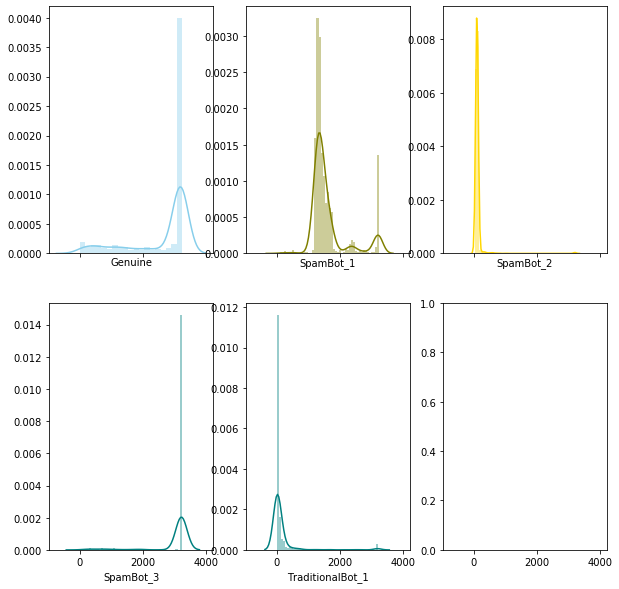

In [458]:
#Histograms
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True)
sns.distplot( d['df1']['user_id'].value_counts() , color="skyblue", axlabel ="Genuine",ax=axes[0, 0])
sns.distplot( d['df2']["user_id"].value_counts() , color="olive", axlabel ="SpamBot_1",ax=axes[0, 1])
sns.distplot( d['df3']["user_id"].value_counts(), color="gold",axlabel ="SpamBot_2", ax=axes[0, 2])
sns.distplot( d['df4']["user_id"].value_counts() , color="teal",axlabel ="SpamBot_3", ax=axes[1, 0])
sns.distplot( d['df5']["user_id"].value_counts() , color="teal", axlabel ="TraditionalBot_1",ax=axes[1, 1])


Concatening all groups

In [459]:
tweets = pd.concat([d['df1'], d['df2'], d['df3'], d['df4'], d['df5']])
tweets.shape

(6441589, 26)

In [460]:
#transform id´s in object
tweets.user_id=tweets.user_id.astype(str)
tweets.id=tweets.id.astype(str)
print(tweets.id.dtypes)
print(tweets.user_id.dtypes)

object
object


In [461]:
#Creating number of tweets columns
tweets['n_tweets']=tweets.groupby(['user_id'])['id'].transform('count')

In [462]:
#to better descriptive plot
tweets.loc[tweets.type!=1, "Class"] = 'Bot'
tweets.loc[tweets.type==1,'Class']= 'Genuino'

proporcao de Bots 0.7500563913655466


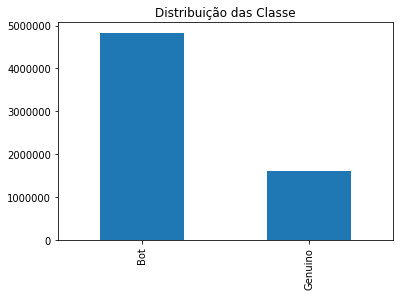

In [463]:
#Proporcao de bots e genuinos
tweets['Class'].value_counts().plot(kind='bar', title= "Distribuição das Classe")
print("proporcao de Bots",tweets[tweets['Class']=='Bot']['id'].count()/tweets.shape[0])

In [464]:
x1=tweets[tweets.type==1]['user_id'].value_counts()
x2=tweets[tweets.type!=1]['user_id'].value_counts()

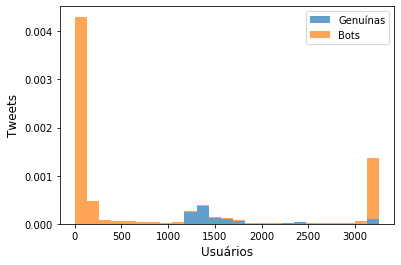

In [465]:
plt.figure()
#line, = ax.plot([1, 2, 3], label='Inline label')
labels= ["Genuínas","Bots"]
colors = ['blue', 'orange']
plt.hist([x1,x2],bins=25, density=1, stacked=True,label=labels, alpha=0.7)
plt.legend(labels)
plt.xlabel("Usuários", fontsize=12) 
plt.ylabel("Tweets", fontsize=12)  
plt.show()


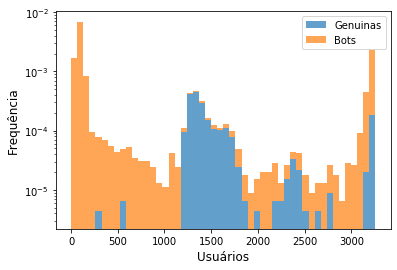

In [466]:
#Stack the data in log scale, to better visualization.
plt.figure()
#line, = ax.plot([1, 2, 3], label='Inline label')
labels= ["Genuinas","Bots"]
colors = ['blue', 'orange']
plt.hist([x1,x2],bins=50, stacked=True, density=1, label=labels, log=True, alpha=.7)
plt.legend(labels)
plt.xlabel("Usuários", fontsize=12) 
plt.ylabel("Frequência", fontsize=12)  
plt.show()


In [467]:
#verifica situacao de missing data nos conjuntos de tweets
print(tweets.isnull().sum(axis = 0))

id                               0
text                         12987
source                          73
user_id                          0
truncated                  6440836
in_reply_to_status_id            1
in_reply_to_user_id              1
in_reply_to_screen_name    5429614
retweeted_status_id              1
geo                        6441589
place                      6314621
contributors               6441589
retweet_count                    1
reply_count                      1
favorite_count                   1
favorited                  6441589
retweeted                  6441589
possibly_sensitive         6415386
num_hashtags                     1
num_urls                         1
num_mentions                     1
created_at                       1
timestamp                        1
crawled_at                       1
updated                          1
type                             0
n_tweets                         0
Class                            0
dtype: int64


In [ ]:
#drop userid null
tweets.dropna(subset=['user_id','text','id','created_at','reply_count' ], inplace=True)

Feaetures with a lot of missing data and deprecated was droped.  Anothers, than have some important informations about its presence, was missing values filled by 0 or "".


In [469]:
columns= ['truncated','geo','place','contributors','crawled_at','updated', 'created_at', 'retweeted', 'favorited' ,'possibly_sensitive']
tweets['in_reply_to_screen_name'].fillna(0, inplace=True)
tweets['source'].fillna("", inplace=True)
tweets.drop(columns=columns, axis=1, inplace=True)


# Filter - Samples

It has many unique tweets. To understand the behavior of the bot, it is necessary to have enought critical mass. That way, I'm going to sample 200 tweets for each user. First, I'll drop all users who have less than 200, hence a random sampling of the remaining ones.



In [470]:
tweets = tweets[(tweets.n_tweets > 200)]

In [471]:
print("min twiiter",tweets.n_tweets.min(), ': quantify tweets',tweets.shape[0], "of: ", tweets.drop_duplicates('user_id').shape[0], "unique users:" )


min twiiter 201 : quantify tweets 6039825 of:  2680 unique users:


In [472]:
tweets.drop_duplicates('user_id')['Class'].value_counts()

Bot        1690
Genuino     990
Name: Class, dtype: int64

In [473]:
#user less 200 tweet
(tweets.groupby(['user_id'])['id'].count() <200).sum()

0

In [474]:
#Random sample of 200 tweets for each user
tweets=tweets.groupby('user_id').apply(lambda x: x.sample(n=200)).reset_index(drop=True)

In [475]:
#are you sure, taht anyone with lower than 200 tweets?
print("yes, i think so: ",(tweets.user_id.value_counts() <200).sum())

yes, i think so:  0


In [476]:
print("Shape all tweets and users", tweets.shape, "unique users", tweets.drop_duplicates('user_id').shape[0])

Shape all tweets and users (536000, 18) unique users 2680


The Tweet object has a long list of ‘root-level’ attributes, including fundamental attributes such as id, created_at, and text. Thererofe, i will drop tweets that have this features as null

In [477]:
#To avoid exeute again all pre-process made so far
#tweets.to_csv('tweets_0.csv', sep=',')

# New features


In [478]:
#tweets=pd.read_csv('tweets_0.csv', sep=',', parse_dates=["timestamp"])


In [479]:
#Drop feature that no have variance, only perceived now.
#tweets.drop("reply_count", axis=1, inplace=True)

The data in all groups is controled by created_at feature (oficial field of API). Only in traditional_bot is in a unknow format.That way, i going to use the timestamp feature. It;s important to observe, that the hour is in another UTC (2 hours more). But is do not matter for us.  



In [480]:
# converte datas tabelas de tweets e cria variaveis temporais - Dia - Mes e Ano 
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])
tweets['year_month']=tweets['timestamp'].apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
tweets['year_month_day']=tweets['timestamp'].apply(lambda x: '{year}-{month}-{day}'.format(year=x.year, month=x.month, day=x.day))
tweets['year']=tweets['timestamp'].apply(lambda x: '{year}'.format(year=x.year))

    



In [481]:
#means
tweets['n_retweet_mean']=tweets.groupby(['user_id'])['retweet_count'].transform('mean')
tweets['n_favorite_mean']=tweets.groupby(['user_id'])['favorite_count'].transform('mean')
tweets['n_hashtags_mean']=tweets.groupby(['user_id'])['num_hashtags'].transform('mean')
tweets['n_urls_mean']=tweets.groupby(['user_id'])['num_urls'].transform('mean')
tweets['n_mentions_mean']=tweets.groupby(['user_id'])['num_mentions'].transform('mean')
#size of twitter
tweets['size_twitter'] = tweets['text'].astype('str').apply(len)
#mean of size of twiiter
tweets['media_size_twitter'] = tweets.groupby(['user_id'])['size_twitter'].transform('mean')
#variance of size twitter.
tweets['dp_size_twitter'] = tweets.groupby(['user_id'])['size_twitter'].transform('mad')

In [482]:
#number of tweets that are reply 
numero_tweets_reply=""
numero_tweets_no_reply=""
tweets['in_reply_to_screen_name']=tweets['in_reply_to_screen_name'].map(lambda x : 1 if x!=0 else x)
#Calulating some values
numero_tweets_reply=tweets.groupby('user_id')['in_reply_to_screen_name'].transform('sum')
#numero_tweets_no_reply=200-numero_tweets_reply
#indicators
tweets['in_tweets_reply']=numero_tweets_reply


In [483]:
#first_tweet - nonsense after sampling
#tweets['first_tweet']=tweets.groupby('user_id')['timestamp'].transform('min')

In [502]:
#another features
aux=pd.DataFrame()
tweets['n_tweet_dia']=tweets.groupby(['user_id','year_month_day'])['id'].transform('count') #Calculo do MAX.
tweets['max_count_tweet_dia']=tweets.groupby('user_id')['n_tweet_dia'].transform('max') # Calculo do In_max.
#tweets['in_tweet_max_dia']=tweets['max_count_tweet_dia']/tweets['n_tweets'] #n_tweets_do_dia_mais_postou/n_total_de_tweets
tweets['count_dias_tweet']= tweets.groupby(['user_id'])['year_month_day'].transform(lambda x: x.nunique())#.apply(lambda  x: x.drop_duplicates('year_month_day')['year_month_day'].transform('value_counts')) #quantos dias usou o twiiter
tweets['in_tweet_dia']=200/tweets['count_dias_tweet'] #total de tweets/dia que usouo twitter

### Columns final dataset

In [503]:
tweets.columns

Index(['id', 'text', 'source', 'user_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'retweet_count', 'reply_count', 'favorite_count', 'num_hashtags',
       'num_urls', 'num_mentions', 'timestamp', 'type', 'n_tweets', 'Class',
       'year_month', 'year_month_day', 'year', 'n_retweet_mean',
       'n_favorite_mean', 'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean',
       'size_twitter', 'media_size_twitter', 'dp_size_twitter',
       'in_tweets_reply', 'n_tweet_dia', 'max_count_tweet_dia',
       'count_dias_tweet', 'in_tweet_dia'],
      dtype='object')

# Descriptive Analysis of Tweet samples 

In [504]:
tweets.describe()

,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,type,n_tweets,n_retweet_mean,n_favorite_mean,n_hashtags_mean,n_urls_mean,n_mentions_mean,size_twitter,media_size_twitter,dp_size_twitter,in_tweets_reply,n_tweet_dia,max_count_tweet_dia,count_dias_tweet,in_tweet_dia
count,5.360000e+05,5.360000e+05,536000.000000,5.360000e+05,5.360000e+05,536000.0,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000,536000.000000
mean,5.497498e+16,8.693321e+07,0.125916,5.913950e+16,3.761093e+02,0.0,0.586216,0.155588,0.186532,0.350233,1.107090,2258.508955,376.109265,0.586216,0.155588,0.186532,0.350233,80.010987,80.010987,27.175228,25.183209,5.360657,13.854851,98.386194,2.671224
std,1.609371e+17,3.826076e+08,0.331755,1.667886e+17,1.536298e+04,0.0,2.960734,0.594954,0.395553,0.723938,1.213462,1011.277941,1887.722896,1.760147,0.276912,0.233966,0.433771,36.426700,15.607611,4.803143,36.174915,9.799772,12.657535,38.570960,2.611296
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,201.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.280000,4.228100,0.000000,1.000000,2.000000,3.000000,1.058201
25%,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1343.000000,0.100000,0.030000,0.035000,0.025000,0.000000,53.000000,71.745000,24.119850,0.000000,1.000000,7.000000,59.000000,1.587302
50%,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,2756.500000,1.907500,0.215000,0.075000,0.060000,0.040000,77.000000,83.927500,27.677400,1.000000,3.000000,11.000000,102.000000,1.960784
75%,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,3212.000000,83.877500,0.540000,0.150000,0.365000,0.700000,109.000000,88.595000,29.853200,45.000000,5.000000,17.000000,126.000000,3.389831
max,5.941360e+17,3.215616e+09,1.000000,5.941319e+17,3.350111e+06,0.0,430.000000,23.000000,5.000000,16.000000,4.000000,3258.000000,30172.085000,62.845000,6.380000,1.270000,3.095000,160.000000,157.555000,47.367200,194.000000,118.000000,118.000000,189.000000,66.666667


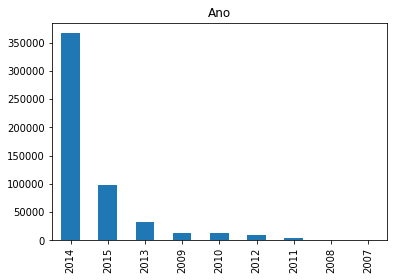

In [505]:
#main month 
tweets['year'].value_counts().sort_values(ascending=False).head(12).plot(kind='bar', title='Ano')

In [506]:
tweets.columns

Index(['id', 'text', 'source', 'user_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'retweet_count', 'reply_count', 'favorite_count', 'num_hashtags',
       'num_urls', 'num_mentions', 'timestamp', 'type', 'n_tweets', 'Class',
       'year_month', 'year_month_day', 'year', 'n_retweet_mean',
       'n_favorite_mean', 'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean',
       'size_twitter', 'media_size_twitter', 'dp_size_twitter',
       'in_tweets_reply', 'n_tweet_dia', 'max_count_tweet_dia',
       'count_dias_tweet', 'in_tweet_dia'],
      dtype='object')

In [511]:
numerical =['retweet_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions', 'n_tweet_dia'] #unicas para cada twitter com alta dipersao
numerical_2= ['size_twitter','dp_size_twitter'] #unicas para cada twiiter com dispersao menor
numerical_3 = ['count_dias_tweet','in_tweet_dia', 'max_count_tweet_dia','in_tweets_reply'] # iguais para todo o grupo de  200 tweets de um usuario. Varia de usuario por usuario.

Bot        338000
Genuino    198000
Name: Class, dtype: int64
 rate of Bots 0.6305970149253731


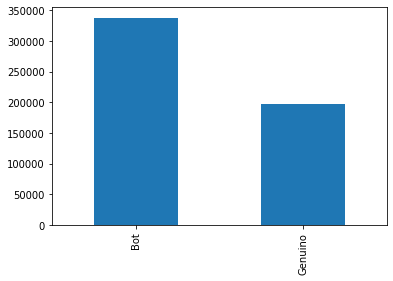

In [512]:
#classes status
tweets['Class'].value_counts().plot(kind='bar')
print(tweets['Class'].value_counts())
print(" rate of Bots",tweets[tweets['Class']=='Bot']['id'].count()/tweets.shape[0])

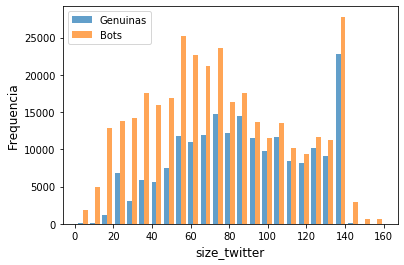

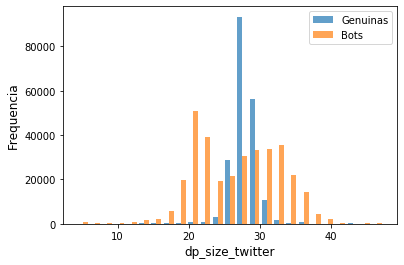

In [513]:
for x in numerical_2: 
    x1=tweets[tweets.type==1][x]
    x2=tweets[tweets.type!=1][x]
    plt.figure()
    labels= ["Genuinas","Bots"]
    colors = ['blue', 'orange']
    plt.hist([x1,x2],bins=25, label=labels, alpha=0.7)
    plt.legend(labels)
    plt.xlabel(x, fontsize=12) 
    plt.ylabel("Frequencia", fontsize=12) 
    #plt.suptitle(x)
    plt.show()


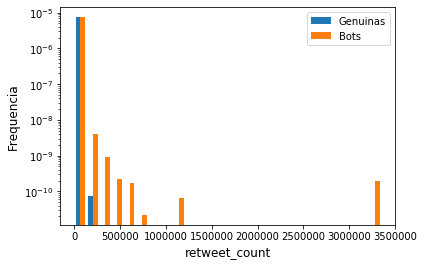

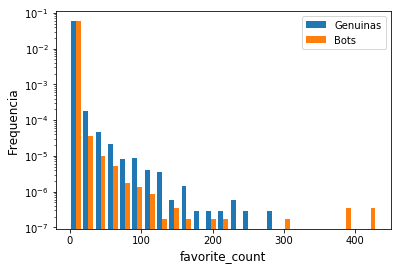

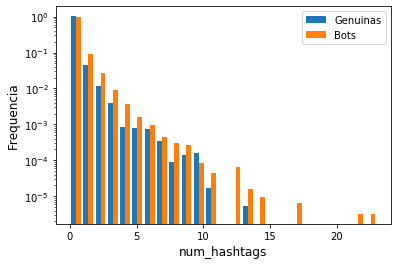

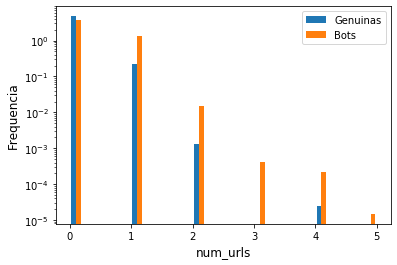

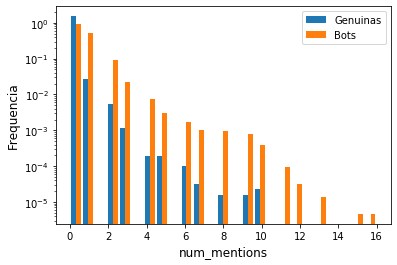

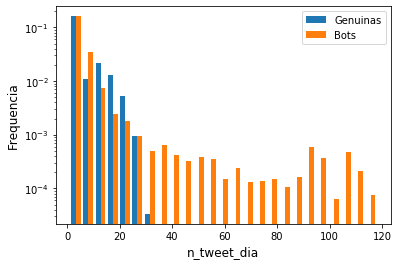

In [514]:
#Features with a large dispersion, i will use the logatimic scale, for better visualization
for x in numerical: 
    x1=tweets[tweets.type==1][x]
    x2=tweets[tweets.type!=1][x]
    plt.figure()
    labels= ["Genuinas","Bots"]
    colors = ['blue', 'orange']
    plt.hist([x1,x2],bins=25, density=0.2, label=labels, log=True)
    plt.legend(labels)
    plt.xlabel(x, fontsize=12) 
    plt.ylabel("Frequencia", fontsize=12) 
    #plt.suptitle(x)
    plt.show()

    

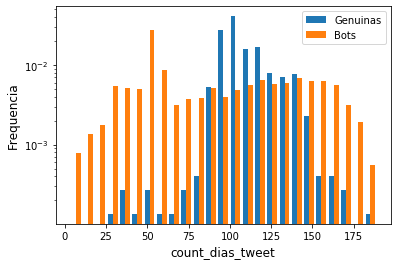

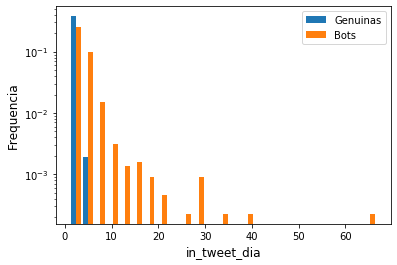

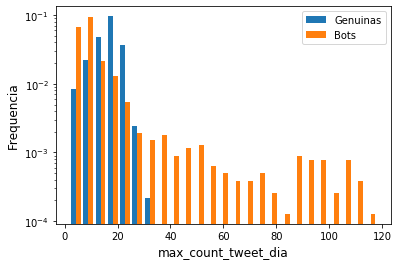

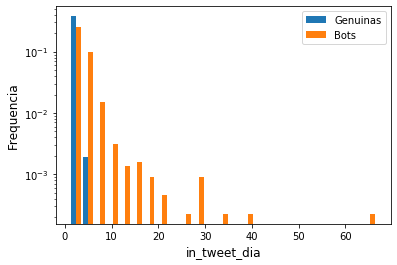

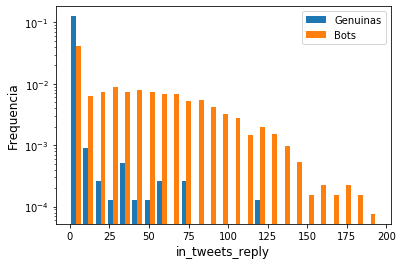

In [515]:
for x in numerical_3: 
    x1=tweets[tweets.type==1].drop_duplicates('user_id')[x]
    x2=tweets[tweets.type!=1].drop_duplicates('user_id')[x]
    labels= ["Genuinas","Bots"]
    colors = ['blue', 'orange']
    plt.hist([x1,x2],bins=25, density=1, label=labels, log=True)
    plt.legend(labels)
    plt.xlabel(x, fontsize=12) 
    plt.ylabel("Frequencia", fontsize=12) 
    #plt.suptitle(x)
    plt.show()


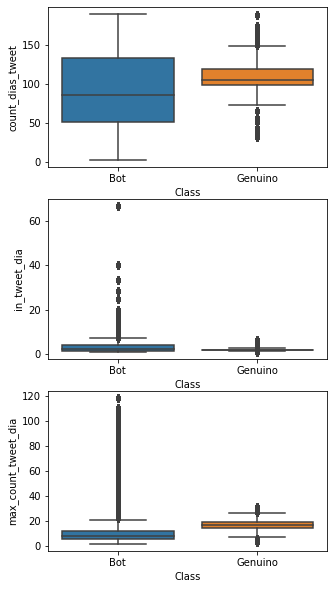

In [516]:
#boxplot, in some times is better to understand the distribution
fig, ax = plt.subplots(3, figsize=(5, 10))
for var, subplot in zip(numerical_3, ax.flatten()):
    sns.boxplot(x='Class', y=var, data=tweets, ax=subplot)

# Statistics Tests - Some backgroud hypothesis

In [517]:
#independent samples: 
bot = tweets[tweets['Class']=='Bot']  
gen = tweets[tweets['Class']=='Genuino']  

In [518]:
#have some idea about the bots and genuines statistics
columns = ["retweet_count", "num_mentions", "in_tweets_reply"]
bot[columns].describe()

,retweet_count,num_mentions,in_tweets_reply
count,3.380000e+05,338000.000000,338000.000000
mean,5.912283e+02,0.538843,39.384024
std,1.933140e+04,0.840602,38.780411
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,0.000000e+00,0.000000,32.000000
75%,0.000000e+00,1.000000,65.000000
max,3.350111e+06,16.000000,194.000000


In [519]:
#have some idea about the genuines statistics
gen[columns].describe()

,retweet_count,num_mentions,in_tweets_reply
count,198000.000000,198000.000000,198000.000000
mean,8.885813,0.028263,0.941414
std,880.379546,0.219341,6.582101
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,264529.000000,10.000000,121.000000


Do bots retweet more?

H0: Bots retweet like a genuine accounts

H1: Bots retweet more than genuine accounts

In [520]:
print("Bot retweet mean",bot['retweet_count'].mean())
print("Genuine retweet mean",gen['retweet_count'].mean())
stats.mannwhitneyu(bot['retweet_count'].values, gen['retweet_count'].values, alternative='greater')

Bot retweet mean 591.2283284023669
Genuine retweet mean 8.885813131313132


MannwhitneyuResult(statistic=33460170712.5, pvalue=0.517952007778735)

##### hight P-value not reject the null hypothesis. Than, i don't have statical evidences to accept tha bot retweet more than genuine accounts

#

Do bots have less mentions?

H0: Bots have the same rate of mentions than genuine accounts

H1: Bots have less rat of mentions than genuine accounts


In [521]:
print("Bot mentions mean",bot['num_mentions'].mean())
print("Genuine mentions mean",gen['num_mentions'].mean())
stats.mannwhitneyu(bot['num_mentions'].values, gen['num_mentions'].values, alternative='less')

Bot mentions mean 0.5388431952662722
Genuine mentions mean 0.028262626262626264


MannwhitneyuResult(statistic=46474430778.0, pvalue=1.0)

##### hight P-value not reject the null hypothesis. Than, i don't have statical evidences to accept tha bot have less mentions than genuine accounts

#

Do bots have less reply?

H0: Bots have the same rate of reply than genuine accounts

H1: Bots have less rat of reply than genuine accounts


In [522]:
print("Bot reply mean",bot['in_tweets_reply'].mean())
print("Genuine reply mean",gen['in_tweets_reply'].mean())
stats.mannwhitneyu(bot['in_tweets_reply'].values, gen['in_tweets_reply'].values, alternative='less')

Bot reply mean 39.38402366863905
Genuine reply mean 0.9414141414141414


MannwhitneyuResult(statistic=55538520000.0, pvalue=1.0)

##### hight P-value not reject the null hypothesis. Than, i don't have statical evidences to accept tha bot have less replys than genuine accounts

### Prepare the final dataset and write on disk. 

In [526]:
#drop IDs and features of tweet grain, it's, nao necessarias apos a transformacao para o grao usuario
colunas = ['id','text','source','retweeted_status_id','in_reply_to_status_id','in_reply_to_user_id','in_reply_to_screen_name', 'retweet_count','favorite_count','num_hashtags','num_urls','num_mentions',
           'size_twitter', 'timestamp','year_month_day', 'year_month','year']
tweets.drop(columns= colunas, axis=1, inplace=True)


In [527]:
tweets.to_csv('tweets.csv', sep=',')


## Begin  Manipulating de Database User

In [106]:
#Users accounts have tweets
data1a=pd.read_csv('genuine/users.csv', sep=',')
data2a=pd.read_csv('social_spambots_1/users.csv', sep=',')
data3a=pd.read_csv('social_spambots_2/users.csv', sep=',')
data4a=pd.read_csv('social_spambots_3/users.csv', sep=',')
data5a=pd.read_csv('traditional_spambots_1/users.csv', sep=',')
#Users accounts who haven't tweets
data6a=pd.read_csv('traditional_spambots_2.csv/users.csv', sep=',')
data7a=pd.read_csv('traditional_spambots_3.csv/users.csv', sep=',')
data8a=pd.read_csv('traditional_spambots_4.csv/users.csv', sep=',')


In [107]:
print("quantidade colunas das bases")
print(data1a.columns.size)
print(data2a.columns.size)
print(data3a.columns.size)
print(data4a.columns.size)
print(data5a.columns.size)
print(data6a.columns.size)
print(data7a.columns.size)
print(data8a.columns.size)

quantidade colunas das bases
42
41
40
41
40
40
40
40


In [108]:
data1a.head(2)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,NaN,Tokyo .Japan .,NaN,NaN,1.0,http://pbs.twimg.com/profile_images/5887331863...,https://pbs.twimg.com/profile_banners/15020264...,NaN,https://abs.twimg.com/images/themes/theme1/bg.png,000000,https://pbs.twimg.com/profile_images/588733186...,000000,NaN,000000,http://abs.twimg.com/images/themes/theme1/bg.png,000000,EB0C1F,NaN,NaN,NaN,NaN,NaN,NaN,15years ago X.Lines24,NaN,NaN,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0,0
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,NaN,ja,Tokyo,神奈川県横浜市,1.0,NaN,1.0,http://pbs.twimg.com/profile_images/5737442928...,https://pbs.twimg.com/profile_banners/24927823...,1.0,https://abs.twimg.com/images/themes/theme1/bg.png,333333,https://pbs.twimg.com/profile_images/573744292...,C0DEED,NaN,DDEEF6,http://abs.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,32400.0,NaN,NaN,NaN,NaN,NaN,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),NaN,NaN,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0,0


In [159]:
da = {} 
da['df1a'] = data1a.copy()
da['df2a'] = data2a.copy()
da['df3a'] = data3a.copy()
da['df4a'] = data4a.copy()
da['df5a'] = data5a.copy()
###
da['df6a'] = data6a.copy()
da['df7a'] = data7a.copy()
da['df8a'] = data8a.copy()

In [160]:
for x in da.keys():
      print("Shape of "+x+" ", da[x].shape, )

Shape of df1a  (3474, 42)
Shape of df2a  (991, 41)
Shape of df3a  (3457, 40)
Shape of df4a  (464, 41)
Shape of df5a  (1000, 40)
Shape of df6a  (100, 40)
Shape of df7a  (403, 40)
Shape of df8a  (1128, 40)


In [161]:
#drop colunas exclusivas  e desconhecidas de algumas bases das tabelas  de usuarios(Test_Set)
da['df1a'].drop(['test_set_1', 'test_set_2'], axis=1, inplace=True)
da['df2a'].drop(['test_set_1'], axis=1, inplace=True)
da['df4a'].drop(['test_set_2'], axis=1, inplace=True)

In [162]:
#Adiciona Rotulo - Base GroundTruth
#Genuine
da['df1a']['Alvo'] = 0
#Robos
da['df2a']['Alvo'] = 1
da['df3a']['Alvo'] = 1
da['df4a']['Alvo'] = 1
da['df5a']['Alvo'] = 1
###
da['df6a']['Alvo'] = 1
da['df7a']['Alvo'] = 1
da['df8a']['Alvo'] = 1


In [163]:
#concatenar users
users = pd.concat([da['df1a'], da['df2a'], da['df3a'], da['df4a'], da['df5a'], da['df6a'], da['df7a'], da['df8a']])


In [164]:
users.shape


(11017, 41)

In [165]:
users.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,Alvo
count,1.101700e+04,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,1477.0,72.0,3294.0,9503.0,5331.0,5015.000000,1.0,0.0,78.0,11.0,0.0,0.0,0.0,11017.000000
mean,1.235671e+09,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,1.0,1.0,1.0,1.0,1.0,-5901.954138,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.684669
std,1.084880e+09,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,0.0,0.0,0.0,0.0,0.0,18906.166175,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.464669
min,6.780330e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000
25%,1.068498e+08,46.000000,6.000000e+00,40.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-18000.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000
50%,6.338957e+08,99.000000,1.310000e+02,202.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,-14400.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000
75%,2.360092e+09,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,1.0,1.0,1.0,1.0,1.0,10800.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000
max,4.331280e+09,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,1.0,1.0,1.0,1.0,1.0,46800.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000


In [166]:
#verifica missing
print(users.isnull().sum())


id                                        0
name                                      1
screen_name                               0
statuses_count                            0
followers_count                           0
friends_count                             0
favourites_count                          0
listed_count                              0
url                                    7509
lang                                   1000
time_zone                              6002
location                               6109
default_profile                        9540
default_profile_image                 10945
geo_enabled                            7723
profile_image_url                         0
profile_banner_url                     6198
profile_use_background_image           1514
profile_background_image_url_https     1000
profile_text_color                     1000
profile_image_url_https                1000
profile_sidebar_border_color           1000
profile_background_tile         

In [167]:
#drop tabelas de users atributos descontinuados de altissimo missing
columns = ['following','utc_offset', 'time_zone', "lang", 'geo_enabled','follow_request_sent','notifications',
'profile_background_image_url','profile_image_url','profile_background_color','profile_background_image_url_https',
'profile_background_tile','profile_link_color','profile_sidebar_border_color','profile_sidebar_fill_color','profile_text_color',
'profile_use_background_image','is_translator','contributors_enabled', 'updated', 'protected']
users.drop(columns=columns, axis=1, inplace=True)



In [168]:
#transforma a data de criacao e data de coleta das contas para formato data e calcula idade da conta 
users['timestamp'] = pd.to_datetime(users['timestamp'])
users['age'] = pd.to_datetime(users['crawled_at'])-users['timestamp']
users['age'] = users['age'].dt.days
#exclui crawled-at,
users.drop('crawled_at', axis=1, inplace=True)
    

    

In [169]:
#Variaveis que  por hora, só importam se possuem ou se não possuem.
columns = ['url', 'location', 'default_profile', 'default_profile_image','profile_image_url_https','profile_banner_url', 'verified']
users[columns]=users[columns].notnull().astype('int').astype('str')
users[columns]=users[columns].notnull().astype('int').astype('str')

In [170]:
#only description and name hav some missing. But i will count the size and fill with "" below
print(users.isnull().sum())


id                            0
name                          1
screen_name                   0
statuses_count                0
followers_count               0
friends_count                 0
favourites_count              0
listed_count                  0
url                           0
location                      0
default_profile               0
default_profile_image         0
profile_banner_url            0
profile_image_url_https       0
verified                      0
description                4671
created_at                    0
timestamp                     0
Alvo                          0
age                           0
dtype: int64


## New features

In [171]:
#Users with hight "in_following_followers", have low influence. To avoid division by zero, it's necessary a special condition
x = users[users["followers_count"]== 0]
x['in_following_followers'] = x['friends_count']
y = users[users["followers_count"]!= 0]
y['in_following_followers'] = y['friends_count']/y['followers_count']
users = pd.concat([x,y])
#users.shape
#users2.shape

### Creating indicator to size text fiels and for proportion of number in Screen_Name 

In [174]:
users['n_alfa_sname']=0
users['n_number_sname']=0
users['size_sname']=users['screen_name'].astype('str').apply(len)
users['description'].fillna("", inplace=True) #fill missing with "" to count
users['size_description']=users['description'].astype('str').apply(len)
users['name'].fillna("", inplace=True) # fill missing with "" to count
users['size_name']=users['name'].astype('str').apply(len)

In [175]:
users.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,Alvo,age,in_following_followers,n_alfa_sname,n_number_sname,size_sname,size_description,size_name
count,1.101700e+04,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.0,11017.0,11017.000000,11017.000000,11017.000000
mean,1.235671e+09,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,0.684669,835.729418,4.792586,0.0,0.0,11.800490,46.488064,12.368249
std,1.084880e+09,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,0.464669,837.142279,6.900775,0.0,0.0,2.238532,52.232170,4.144440
min,6.780330e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.0,0.0,3.000000,0.000000,0.000000
25%,1.068498e+08,46.000000,6.000000e+00,40.000000,0.000000,0.000000,0.000000,72.000000,0.888157,0.0,0.0,10.000000,0.000000,10.000000
50%,6.338957e+08,99.000000,1.310000e+02,202.000000,0.000000,1.000000,1.000000,523.000000,1.844828,0.0,0.0,12.000000,26.000000,13.000000
75%,2.360092e+09,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,1.000000,1333.000000,6.388889,0.0,0.0,14.000000,96.000000,15.000000
max,4.331280e+09,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,1.000000,3021.000000,49.000000,0.0,0.0,15.000000,298.000000,48.000000


In [176]:
i=0
for y in users['screen_name']:
    #print("nome",y)
    a=n=0
    for c in y:
        #print("caracter",c)
        s = c.isdigit()
        if s: #se é digito, soma 1
            n+=1
        else:
            a+=1
        
        #print("numero",n, "alfa",a)
    #print('antes',i)
    users['n_alfa_sname'].iloc[i]=a    
    users['n_number_sname'].iloc[i]=n
    #print('depois',i)
    i+=1
    #print('prox pos',i)

        

In [177]:
#criacao indice de quantidade de numeros
users['in_number_sname'] = users['n_number_sname']/users['size_sname']


In [179]:
#renomeia id da base de usuarios para user_id (mesmo nome da tabela tweet)
users.rename(columns= {'id': 'user_id'}, inplace=True)


In [180]:
#exclui outras features da tabela de usuarios que geraram outras variaveis pra representa-las - n_alfa_sname nem usou :(
colunas = ['name', 'screen_name', 'created_at','description']
#for x in da.keys():
users.drop(columns= colunas, axis=1, inplace=True)

In [334]:
#users.to_csv("users.csv", sep=',')

# Analysis Descriptive of Users

In [536]:
#tweets=pd.read_csv('tweets.csv', sep=',', parse_dates=[ "first_tweet"])
#users=pd.read_csv('users.csv', sep=',', parse_dates=[ "timestamp"])

In [183]:
users.head(2)

,user_id,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,location,default_profile,default_profile_image,profile_banner_url,profile_image_url_https,verified,timestamp,Alvo,age,in_following_followers,n_alfa_sname,n_number_sname,size_sname,size_description,size_name,in_number_sname
48,465196345,120,0,0,0,0,0,1,0,0,0,1,0,2012-01-16 03:36:42,1,875,0.0,14,0,14,61,15,0.0
51,465306140,33,0,0,0,0,0,1,0,0,0,1,0,2012-01-16 07:13:22,1,865,0.0,14,0,14,133,15,0.0


In [181]:
users.describe()

,user_id,statuses_count,followers_count,friends_count,favourites_count,listed_count,Alvo,age,in_following_followers,n_alfa_sname,n_number_sname,size_sname,size_description,size_name,in_number_sname
count,1.101700e+04,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000
mean,1.235671e+09,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,0.684669,835.729418,4.792586,11.433149,0.367341,11.800490,46.488064,12.368249,0.032664
std,1.084880e+09,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,0.464669,837.142279,6.900775,2.452286,1.036392,2.238532,52.232170,4.144440,0.090088
min,6.780330e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.068498e+08,46.000000,6.000000e+00,40.000000,0.000000,0.000000,0.000000,72.000000,0.888157,10.000000,0.000000,10.000000,0.000000,10.000000,0.000000
50%,6.338957e+08,99.000000,1.310000e+02,202.000000,0.000000,1.000000,1.000000,523.000000,1.844828,12.000000,0.000000,12.000000,26.000000,13.000000,0.000000
75%,2.360092e+09,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,1.000000,1333.000000,6.388889,13.000000,0.000000,14.000000,96.000000,15.000000,0.000000
max,4.331280e+09,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,1.000000,3021.000000,49.000000,15.000000,11.000000,15.000000,298.000000,48.000000,0.800000


In [152]:
users.columns 

Index(['user_id', 'statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'location',
       'default_profile', 'default_profile_image', 'profile_banner_url',
       'profile_image_url_https', 'verified', 'timestamp', 'Alvo', 'age',
       'n_alfa_sname', 'n_number_sname', 'size_sname', 'size_description',
       'size_name', 'in_number_sname'],
      dtype='object')

In [182]:
numerical= ['statuses_count','followers_count','friends_count','favourites_count','listed_count','age',
       'in_following_followers', 'size_sname', 'size_description', 'size_name',
       'in_number_sname',"n_number_sname"]
categorical =['url', 'location','default_profile', 'default_profile_image', 'profile_banner_url',
       'profile_image_url_https', 'verified']

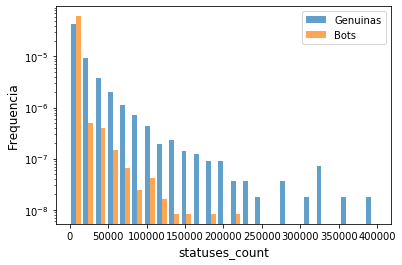

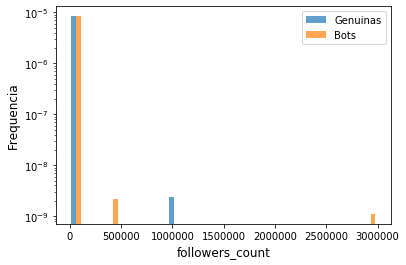

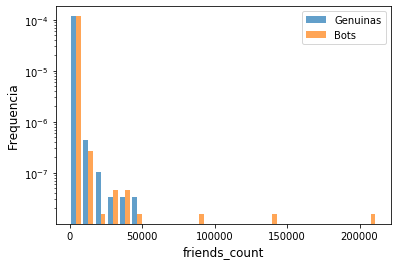

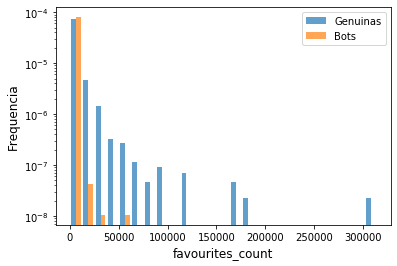

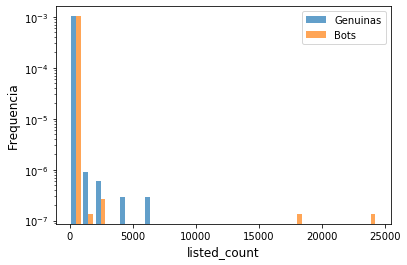

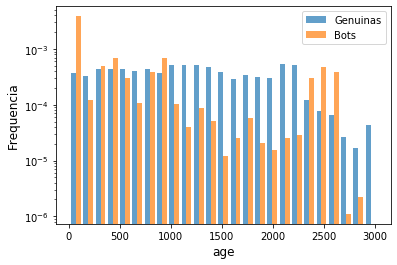

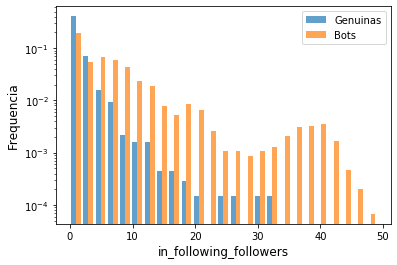

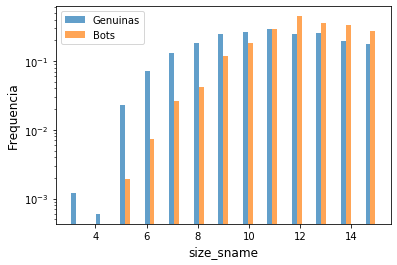

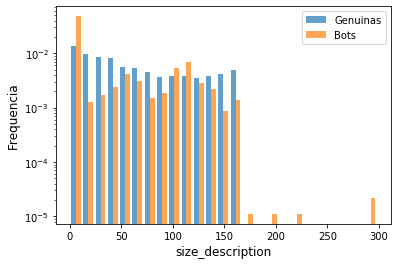

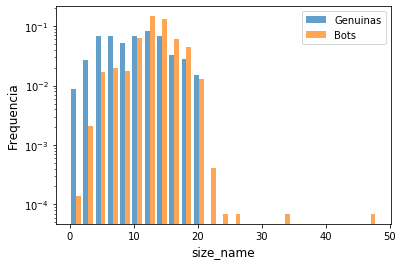

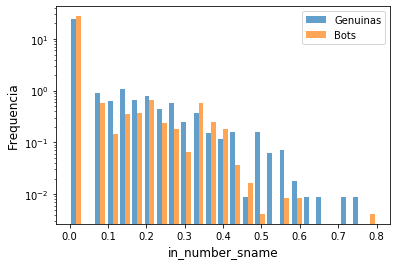

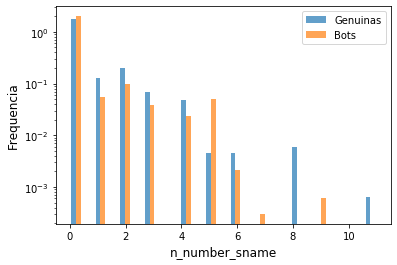

In [185]:
for x in numerical: 
    x1=users[users.Alvo==0][x]
    x2=users[users.Alvo==1][x]
    labels= ["Genuinas","Bots"]
    colors = ['blue', 'orange']
    plt.hist([x1,x2],bins=25, label=labels, alpha=0.7, normed=True, log=True)
    plt.legend(labels)
    plt.xlabel(x, fontsize=12) 
    plt.ylabel("Frequencia", fontsize=12) 
    #plt.suptitle(x)
    plt.show()



In [186]:
users['Class'] = users['Alvo'].map(lambda x: 'Bot' if x ==1 else 'Genuino')  

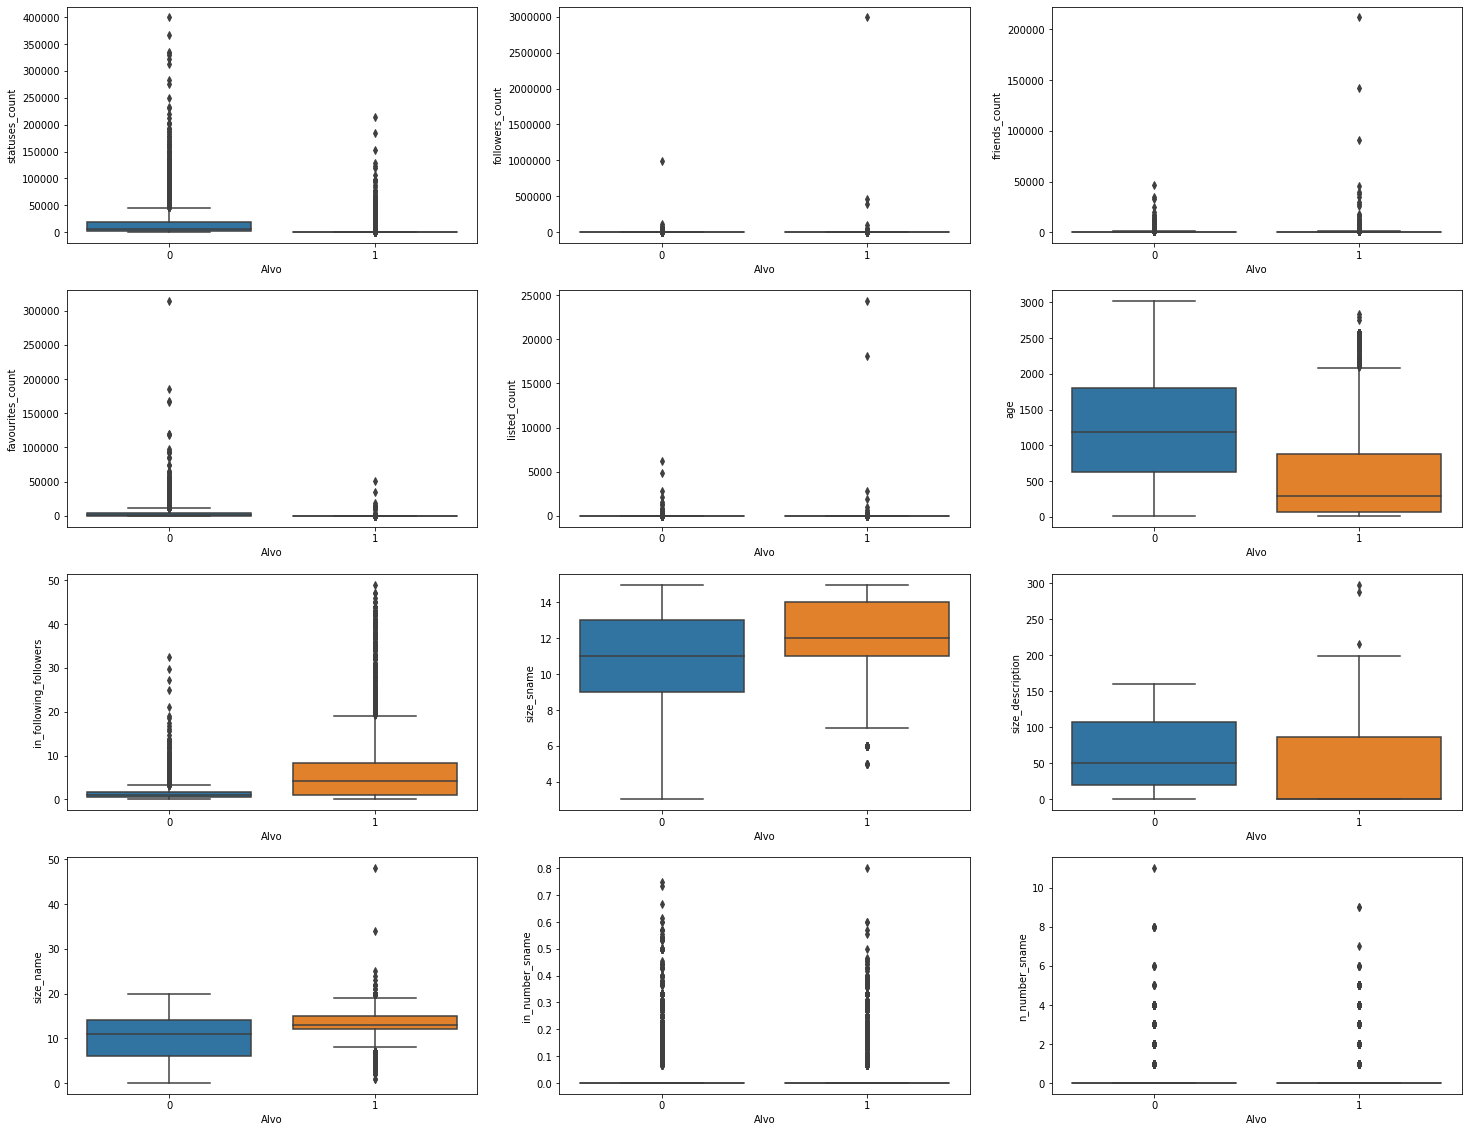

In [187]:
fig, ax = plt.subplots(4, 3, figsize=(25, 20))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='Alvo', y=var, data=users, ax=subplot)

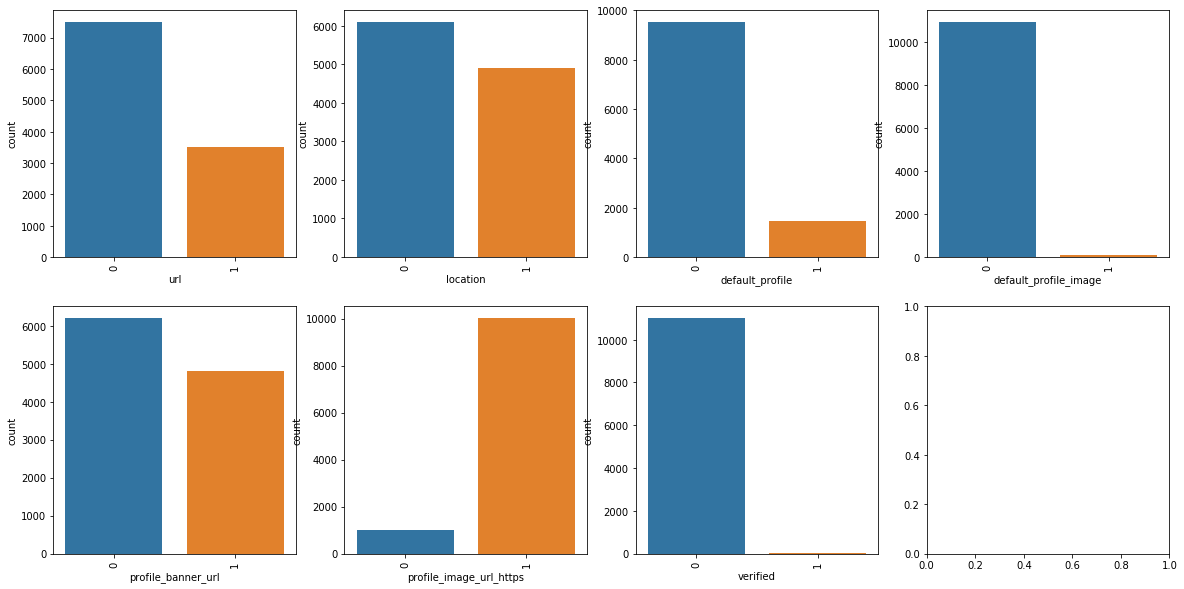

In [388]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(users[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Statical Tests

In [211]:
#to test if some sample are normal, But the histograms show that's not. I will use a nonparametric staical test for two independent samples
stat, p = stats.normaltest(bot['statuses_count'])
print(stat, p)

12418.150152245846 0.0


In [190]:
#independent samples: 
bot = users[users['Alvo']==1]  
gen = users[users['Alvo']==0]  


In [191]:
columns=['age', 'size_name', 'size_sname', 'statuses_count' ]
bot[columns].describe()

,age,size_name,size_sname,statuses_count
count,7543.000000,7543.000000,7543.000000,7543.000000
mean,657.870211,13.297362,12.232268,1802.219144
std,836.122823,3.433963,1.937401,7873.271121
min,14.000000,1.000000,5.000000,0.000000
25%,68.000000,12.000000,11.000000,41.000000
50%,295.000000,13.000000,12.000000,60.000000
75%,873.000000,15.000000,14.000000,131.000000
max,2840.000000,48.000000,15.000000,214410.000000


In [192]:
columns=['age', 'size_name', 'size_sname', 'statuses_count' ]
gen[columns].describe()

,age,size_name,size_sname,statuses_count
count,3474.00000,3474.000000,3474.000000,3474.000000
mean,1221.91019,10.350892,10.862982,16958.220207
std,697.73150,4.788329,2.541494,30696.286104
min,11.00000,0.000000,3.000000,3.000000
25%,630.00000,6.000000,9.000000,1810.250000
50%,1191.00000,11.000000,11.000000,6609.000000
75%,1803.00000,14.000000,13.000000,19467.000000
max,3021.00000,20.000000,15.000000,399555.000000


Bot are younger?

h0: Age bot is the same of genuine accounts

h1: Age bot is lower than genuine accounts

In [212]:
print("bot age mean",bot['age'].mean())
print("gen age mean",gen['age'].mean())

stats.mannwhitneyu(bot['age'].values, gen['age'].values, alternative='less')

bot age mean 657.8702107914622
gen age mean 1221.9101899827288


MannwhitneyuResult(statistic=6661119.5, pvalue=0.0)

##### lower P-value reject the null hypothesis. Than,  have statical evidences to accept tha bots are youunger than genuine accounts

Bot have a bigger name, sname, and number in name?

h0: name's  bot is the same of genuine accounts (the same to sname and number in name)

h1: name's bot is greater than genuine accounts (the same to sname and number in name)

In [202]:
print("bot name mean",bot['size_name'].mean())
print("gen name mean",gen['size_name'].mean())
print("bot sname mean",bot['size_sname'].mean())
print("gen sname mean",gen['size_sname'].mean())
print("bot in_number_sname mean",bot['in_number_sname'].mean())
print("gen in_number_sname mean",gen['in_number_sname'].mean())
###
print("name",stats.mannwhitneyu(bot['size_name'].values, gen['size_name'].values, alternative='greater'))
print("sname",stats.mannwhitneyu(bot['size_sname'].values, gen['size_sname'].values, alternative='greater'))
print("in_number_sname",stats.mannwhitneyu(bot['in_number_sname'].values, gen['in_number_sname'].values, alternative='greater'))


bot name mean 13.297361792390296
gen name mean 10.350892343120323
bot sname mean 12.232268328251358
gen sname mean 10.862982153137594
bot in_number_sname mean 0.026901520342458962
gen in_number_sname mean 0.04517679435641439
name MannwhitneyuResult(statistic=17978268.0, pvalue=7.519633630686545e-219)
sname MannwhitneyuResult(statistic=17221172.0, pvalue=1.3794568293699739e-158)
in_number_sname MannwhitneyuResult(statistic=11977430.0, pvalue=1.0)


##### lower P-value reject the null hypothesis. Than,  have statical evidences to accept that  bot's name and the sname is bigger than genuine accountss. But t have not the same evidences to quantity of number in name.

Bot have more tweets?

h0: bot have the same ammount of tweets than genuine accounts 

h1: bot have the greater ammount of tweets than genuine accounts 

In [213]:
print("bot statuses_count mean",bot['statuses_count'].mean())
print("gen statuses_count mean",gen['statuses_count'].mean())

stats.mannwhitneyu(bot['statuses_count'].values, gen['statuses_count'].values, alternative='greater')

bot statuses_count mean 1802.2191435768261
gen statuses_count mean 16958.220207253886


MannwhitneyuResult(statistic=2409156.0, pvalue=1.0)

##### hight P-value not reject the null hypothesis. Than, i don't have statical evidences to accept tha bot have more tweets than genuine accounts

# Merging users and tweets datasets 

In [597]:
print(users.columns)
print(tweets.columns)

Index(['user_id', 'statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'location',
       'default_profile', 'default_profile_image', 'profile_banner_url',
       'profile_image_url_https', 'verified', 'timestamp', 'Alvo', 'age',
       'in_following_followers', 'n_alfa_sname', 'n_number_sname',
       'size_sname', 'size_description', 'size_name', 'in_number_sname',
       'Class'],
      dtype='object')
Index(['user_id', 'reply_count', 'type', 'n_tweets', 'Class', 'n_retweet_mean',
       'n_favorite_mean', 'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean',
       'media_size_twitter', 'dp_size_twitter', 'in_tweets_reply',
       'n_tweet_dia', 'max_count_tweet_dia', 'count_dias_tweet',
       'in_tweet_dia'],
      dtype='object')


In [598]:
#selecting columns. Droping some redundant features and desnecessary
columns_users=['user_id', 'statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'location','default_profile', 
       'default_profile_image', 'profile_banner_url','profile_image_url_https', 
       'verified','age','in_following_followers','n_number_sname',
       'size_sname', 'size_description', 'size_name', 'in_number_sname', 'Alvo']
columns_tweets=['user_id','n_retweet_mean',
       'n_favorite_mean', 'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean',
       'media_size_twitter', 'dp_size_twitter', 'in_tweets_reply',
       'n_tweet_dia', 'max_count_tweet_dia', 'count_dias_tweet',
       'in_tweet_dia']

tweets.user_id = tweets.user_id.astype('float')
users.user_id = users.user_id.astype('float')

a = tweets[columns_tweets].drop_duplicates('user_id')
b = users[columns_users]
database=pd.merge(b, a, on='user_id', how='right')
database.drop('user_id', axis=1, inplace=True)

In [599]:
database.shape

(2680, 32)

In [600]:
database.Alvo.value_counts()

1    1635
0    1045
Name: Alvo, dtype: int64

## Correlation and and variance analysis

In [601]:
#database=pd.read_csv('database.csv', sep=',')
#database.drop('Unnamed: 0', inplace=True, axis=1)

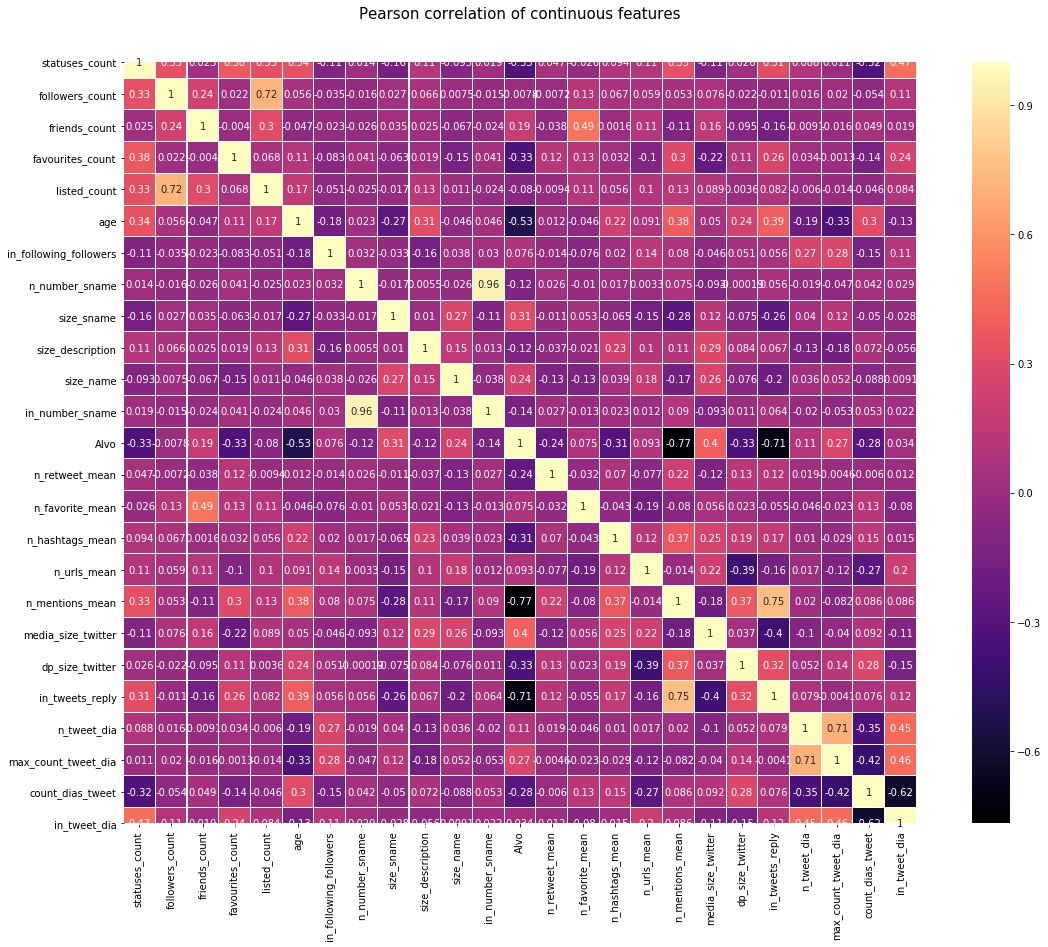

In [602]:
colormap = plt.cm.magma
plt.figure(figsize=(20,14))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(database.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [603]:
#cobvert binary atributes in int to calcuate the variance
binary= ['url', 'location','default_profile', 'default_profile_image', 'profile_banner_url',
       'profile_image_url_https', 'verified']

database[binary]=database[binary].astype(int)
print (database[binary].dtypes)

url                        int64
location                   int64
default_profile            int64
default_profile_image      int64
profile_banner_url         int64
profile_image_url_https    int64
verified                   int64
dtype: object


In [604]:
for x in database.columns:
    print('variance of ' +x+' is:', es.variance(database[x]))
    

variance of statuses_count is: 583544643.8330737
variance of followers_count is: 463880747.26758367
variance of friends_count is: 9620102.656174755
variance of favourites_count is: 49068866.66233767
variance of listed_count is: 20600.849320586316
variance of url is: 0.20887499791078204
variance of location is: 0.23739031605689356
variance of default_profile is: 0.1696444986712574
variance of default_profile_image is: 0.000745990094321227
variance of profile_banner_url is: 0.2414577448702735
variance of profile_image_url_https is: 0.0404014362677096
variance of verified is: 0.0026060904882084543
variance of age is: 358959.1045543559
variance of in_following_followers is: 5.255970234829271
variance of n_number_sname is: 0.638660560578964
variance of size_sname is: 5.594562322764676
variance of size_description is: 1942.5362792699436
variance of size_name is: 18.55931484793279
variance of in_number_sname is: 0.005443541494297804
variance of Alvo is: 0.23797237218164496
variance of n_retwe

In [605]:
#drop some invariance features


# Discretize some continuos variables to better undestanding on rules

1.9075

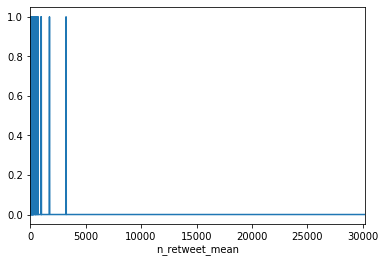

In [606]:
database.groupby('n_retweet_mean').mean().Alvo.plot()
#x.groupby('size_name').mean().Alvo.plot()
#plt.title("Bot Rate vs Size name")
##plt.ylabel("Bot Rate")
#plt.xlabel("Size_name")
#plt.ylim(0,1)
#plt.show()
database.n_retweet_mean.median()

i' will swap the feature on code above, to try to understand the rate of bot in each group for numerical features. The intend of this, is find breaks to discretize the features. 

In [607]:
def bin_age(df):
    col="age"
    if df[col]  <90:
        return '3 months'
    elif df[col] <180:
        return '6 months'
    elif df[col] <360:
        return '1 year'
    elif df[col] <720:
        return '2 years'
    else: 
        return '> 2 years'

In [608]:
database["age"]= database.apply(bin_age, axis=1)

In [609]:
database["age"].value_counts()

> 2 years    1998
2 years       510
6 months       87
3 months       46
1 year         39
Name: age, dtype: int64

In [610]:
def bin_statuses_count(df):
    col="statuses_count"
    if df[col]  <100:
        return 'cem'
    elif df[col] <200:
        return 'duzentos'
    elif df[col] <300:
        return 'trezentos'
    elif df[col] <500:
        return 'quinhentos'
    elif df[col] <1000:
        return 'mil'
    else: 
        return '> mil'

In [611]:
database["statuses_count"] = database.apply(bin_statuses_count, axis=1)

In [612]:
database["statuses_count"].value_counts()

> mil         1576
cem            291
duzentos       285
quinhentos     225
trezentos      170
mil            133
Name: statuses_count, dtype: int64

In [613]:
database.to_csv("database.csv", sep=",")

In [614]:
database.statuses_count.value_counts()

> mil         1576
cem            291
duzentos       285
quinhentos     225
trezentos      170
mil            133
Name: statuses_count, dtype: int64